In [1]:
%matplotlib inline

In [2]:
#import dependencies
import json, os, requests

import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl

from datetime import date, time, datetime

from config import weather_api_key

import warnings
warnings.filterwarnings('ignore')

# import citipy - a library which maps the cities nearest to the latitude and longitude. If not present, install
try:
    from citipy import citipy
except:
    import pip
    !pip install citipy

In [59]:
# set range for Lattitde and Longitude
lat_rng = [-90,90]
lon_rng = [-180,180]

# set the weather url 
weather_url = "http://api.openweathermap.org/data/2.5/weather"
#create default params variable
p = {'q':'', 'appid':weather_api_key, 'units':'Imperial'}

#size of sample 
smp_size = 2000

#Output folders
result_dir = "data"
image_dir = "Images"

# Plot Style to use
mpl.style.use('seaborn')

# generate random lattitudes and longitudes
lat_rand = np.random.uniform(lat_rng[0],lat_rng[1], size = smp_size)
lon_rand = np.random.uniform(lon_rng[0],lon_rng[1], size = smp_size)

In [7]:
#iterate through the dataframe to get the nearest city and its country
cities_sel = []

for row in zip(lat_rand,lon_rand):
    tmp_obj = citipy.nearest_city(row[0], row[1])
    city = f"{tmp_obj.city_name},{(tmp_obj.country_code).upper()}"
    
    #add only if city, country is unique else skip it
    if(city not in cities_sel):
        cities_sel.append(city)
    
len(cities_sel)

782

In [11]:
num_cities = len(cities_sel)
# declare a new Dataframe to capture the details
city_weather_DF = pd.DataFrame(columns = ['City','Country','Lat','Lng','Date','Cloudiness','Max Temp','Humidity','Wind Speed'])

print("Begin retrieval of weather information \n ______________________________________")

# Connect to the weather api to extract information for each of the cities in the list
for i, row in enumerate(cities_sel):
    # set the q value in params to city value
    p['q'] = row
    
    # request data from OpenWeatherMap API
    r = requests.get(weather_url, params = p)
    print(f"Processing {i+1} of {num_cities}.... | City : {row} ")
    print(f"{r.url}")
    
    #retrieve the json data and extract the required information 
    json_data = r.json()
    #check if API returned information (success code = 200)
    if(json_data['cod'] == 200):
        city_weather_DF.loc[i] = [json_data['name'], json_data['sys']['country'],
                                  json_data['coord']['lat'], json_data['coord']['lon'],json_data['dt'],
                                  json_data['clouds']['all'],json_data['main']['temp'],
                                  json_data['main']['humidity'],json_data['wind']['speed']                                  
                                 ]
    else:
        print(f"Skipping... City data not available currently.  ")
        

#save the output to a csv file
city_weather_DF.to_csv(os.path.join(result_dir,"CityWeather_Details.csv"), index = False)
city_weather_DF.count()


Begin retrieval of weather information 
 ______________________________________
Processing 1 of 782.... | City : kaka,TM 
http://api.openweathermap.org/data/2.5/weather?q=kaka%2CTM&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 2 of 782.... | City : meulaboh,ID 
http://api.openweathermap.org/data/2.5/weather?q=meulaboh%2CID&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 3 of 782.... | City : talcahuano,CL 
http://api.openweathermap.org/data/2.5/weather?q=talcahuano%2CCL&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 4 of 782.... | City : ushuaia,AR 
http://api.openweathermap.org/data/2.5/weather?q=ushuaia%2CAR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 5 of 782.... | City : tabas,IR 
http://api.openweathermap.org/data/2.5/weather?q=tabas%2CIR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 6 of 782.... | City : nemuro,JP 
http://api.openweathermap.org/data/2.5/weather?q=nemuro%2CJP&appid=216a25

Processing 50 of 782.... | City : motala,SE 
http://api.openweathermap.org/data/2.5/weather?q=motala%2CSE&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 51 of 782.... | City : kedrovyy,RU 
http://api.openweathermap.org/data/2.5/weather?q=kedrovyy%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 52 of 782.... | City : ambon,ID 
http://api.openweathermap.org/data/2.5/weather?q=ambon%2CID&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 53 of 782.... | City : lolua,TV 
http://api.openweathermap.org/data/2.5/weather?q=lolua%2CTV&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 54 of 782.... | City : pacific grove,US 
http://api.openweathermap.org/data/2.5/weather?q=pacific+grove%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 55 of 782.... | City : mandalgovi,MN 
http://api.openweathermap.org/data/2.5/weather?q=mandalgovi%2CMN&appid=216a25d1e5fc1da2b

Processing 100 of 782.... | City : saldanha,ZA 
http://api.openweathermap.org/data/2.5/weather?q=saldanha%2CZA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 101 of 782.... | City : kodiak,US 
http://api.openweathermap.org/data/2.5/weather?q=kodiak%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 102 of 782.... | City : atar,MR 
http://api.openweathermap.org/data/2.5/weather?q=atar%2CMR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 103 of 782.... | City : luganville,VU 
http://api.openweathermap.org/data/2.5/weather?q=luganville%2CVU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 104 of 782.... | City : portland,AU 
http://api.openweathermap.org/data/2.5/weather?q=portland%2CAU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 105 of 782.... | City : kaitangata,NZ 
http://api.openweathermap.org/data/2.5/weather?q=kaitangata%2CNZ&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 106

Processing 146 of 782.... | City : rudnyy,RU 
http://api.openweathermap.org/data/2.5/weather?q=rudnyy%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 147 of 782.... | City : provideniya,RU 
http://api.openweathermap.org/data/2.5/weather?q=provideniya%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 148 of 782.... | City : praia,CV 
http://api.openweathermap.org/data/2.5/weather?q=praia%2CCV&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 149 of 782.... | City : christchurch,NZ 
http://api.openweathermap.org/data/2.5/weather?q=christchurch%2CNZ&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 150 of 782.... | City : mys shmidta,RU 
http://api.openweathermap.org/data/2.5/weather?q=mys+shmidta%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 151 of 782.... | City : opuwo,NA 
http://api.openweathermap.org/data/2.5/weather?q=opuwo%2CNA&appid=216a2

Processing 194 of 782.... | City : walvis bay,NA 
http://api.openweathermap.org/data/2.5/weather?q=walvis+bay%2CNA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 195 of 782.... | City : swellendam,ZA 
http://api.openweathermap.org/data/2.5/weather?q=swellendam%2CZA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 196 of 782.... | City : kudahuvadhoo,MV 
http://api.openweathermap.org/data/2.5/weather?q=kudahuvadhoo%2CMV&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 197 of 782.... | City : marrakesh,MA 
http://api.openweathermap.org/data/2.5/weather?q=marrakesh%2CMA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 198 of 782.... | City : andenes,NO 
http://api.openweathermap.org/data/2.5/weather?q=andenes%2CNO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 199 of 782.... | City : cayenne,GF 
http://api.openweathermap.org/data/2.5/weather?q=cayenne%2CGF&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imper

Processing 242 of 782.... | City : harur,IN 
http://api.openweathermap.org/data/2.5/weather?q=harur%2CIN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 243 of 782.... | City : nylstroom,ZA 
http://api.openweathermap.org/data/2.5/weather?q=nylstroom%2CZA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 244 of 782.... | City : kapoeta,SD 
http://api.openweathermap.org/data/2.5/weather?q=kapoeta%2CSD&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 245 of 782.... | City : tombouctou,ML 
http://api.openweathermap.org/data/2.5/weather?q=tombouctou%2CML&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 246 of 782.... | City : antalaha,MG 
http://api.openweathermap.org/data/2.5/weather?q=antalaha%2CMG&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 247 of 782.... | City : rudnogorsk,RU 
http://api.openweathermap.org

Processing 291 of 782.... | City : gherghesti,RO 
http://api.openweathermap.org/data/2.5/weather?q=gherghesti%2CRO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 292 of 782.... | City : katsuura,JP 
http://api.openweathermap.org/data/2.5/weather?q=katsuura%2CJP&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 293 of 782.... | City : la tuque,CA 
http://api.openweathermap.org/data/2.5/weather?q=la+tuque%2CCA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 294 of 782.... | City : tocantinopolis,BR 
http://api.openweathermap.org/data/2.5/weather?q=tocantinopolis%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 295 of 782.... | City : saint george,BM 
http://api.openweathermap.org/data/2.5/weather?q=saint+george%2CBM&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 296 of 782.... | City : tura,RU 
http://api.openweathermap.org/data/2.5/weather?q=tura%2CRU

Processing 339 of 782.... | City : jian,CN 
http://api.openweathermap.org/data/2.5/weather?q=jian%2CCN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 340 of 782.... | City : peterhead,GB 
http://api.openweathermap.org/data/2.5/weather?q=peterhead%2CGB&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 341 of 782.... | City : moindou,NC 
http://api.openweathermap.org/data/2.5/weather?q=moindou%2CNC&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 342 of 782.... | City : arauca,CO 
http://api.openweathermap.org/data/2.5/weather?q=arauca%2CCO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 343 of 782.... | City : sao jose da coroa grande,BR 
http://api.openweathermap.org/data/2.5/weather?q=sao+jose+da+coroa+grande%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 344 of 782.... | City : varkkallai,IN 
http://api.openweathermap.org/data/2.5/weather?q=varkkallai%2CIN&appid=216a25d1e5fc1da2b798d855ba143d3b&u

Processing 387 of 782.... | City : lakselv,NO 
http://api.openweathermap.org/data/2.5/weather?q=lakselv%2CNO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 388 of 782.... | City : zhigansk,RU 
http://api.openweathermap.org/data/2.5/weather?q=zhigansk%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 389 of 782.... | City : warqla,DZ 
http://api.openweathermap.org/data/2.5/weather?q=warqla%2CDZ&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 390 of 782.... | City : marquette,US 
http://api.openweathermap.org/data/2.5/weather?q=marquette%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 391 of 782.... | City : paracuru,BR 
http://api.openweathermap.org/data/2.5/weather?q=paracuru%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 392 of 782.... | City : gaimersheim,DE 
http://api.openweathermap.org/data/2.5/weather?q=gaimersheim%2CDE&appid=216a25d

Processing 436 of 782.... | City : iki-burul,RU 
http://api.openweathermap.org/data/2.5/weather?q=iki-burul%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 437 of 782.... | City : xuddur,SO 
http://api.openweathermap.org/data/2.5/weather?q=xuddur%2CSO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 438 of 782.... | City : wrexham,GB 
http://api.openweathermap.org/data/2.5/weather?q=wrexham%2CGB&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 439 of 782.... | City : palmer,US 
http://api.openweathermap.org/data/2.5/weather?q=palmer%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 440 of 782.... | City : mazamitla,MX 
http://api.openweathermap.org/data/2.5/weather?q=mazamitla%2CMX&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 441 of 782.... | City : phan rang,VN 
http://api.openweathermap.org/data/2.5/weather?q=phan+rang%2CVN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... Ci

Processing 484 of 782.... | City : maniitsoq,GL 
http://api.openweathermap.org/data/2.5/weather?q=maniitsoq%2CGL&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 485 of 782.... | City : olga,RU 
http://api.openweathermap.org/data/2.5/weather?q=olga%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 486 of 782.... | City : talnakh,RU 
http://api.openweathermap.org/data/2.5/weather?q=talnakh%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 487 of 782.... | City : porbandar,IN 
http://api.openweathermap.org/data/2.5/weather?q=porbandar%2CIN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 488 of 782.... | City : price,US 
http://api.openweathermap.org/data/2.5/weather?q=price%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 489 of 782.... | City : akdepe,TM 
http://api.openweathermap.org/data/2.5/weather?q=akdepe%2CTM&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 490 of 782.... 

Processing 532 of 782.... | City : dubti,ET 
http://api.openweathermap.org/data/2.5/weather?q=dubti%2CET&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 533 of 782.... | City : salisbury,US 
http://api.openweathermap.org/data/2.5/weather?q=salisbury%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 534 of 782.... | City : izhevskoye,RU 
http://api.openweathermap.org/data/2.5/weather?q=izhevskoye%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 535 of 782.... | City : arvika,SE 
http://api.openweathermap.org/data/2.5/weather?q=arvika%2CSE&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 536 of 782.... | City : nova russas,BR 
http://api.openweathermap.org/data/2.5/weather?q=nova+russas%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 537 of 782.... | City : bailen,ES 
http://api.openweathermap.org/data/2.5/weather?q=bailen%2CES&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 5

Processing 581 of 782.... | City : general teran,MX 
http://api.openweathermap.org/data/2.5/weather?q=general+teran%2CMX&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 582 of 782.... | City : pamanukan,ID 
http://api.openweathermap.org/data/2.5/weather?q=pamanukan%2CID&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 583 of 782.... | City : broken hill,AU 
http://api.openweathermap.org/data/2.5/weather?q=broken+hill%2CAU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 584 of 782.... | City : pedra azul,BR 
http://api.openweathermap.org/data/2.5/weather?q=pedra+azul%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 585 of 782.... | City : yazd,IR 
http://api.openweathermap.org/data/2.5/weather?q=yazd%2CIR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 586 of 782.... | City : larreynaga,NI 
http://api.openweathermap.org/data/2.5/weather?q=larreynaga%2CNI&appid=216a25d1e5fc1da2b798d855ba143d3b&units=I

Processing 630 of 782.... | City : sug-aksy,RU 
http://api.openweathermap.org/data/2.5/weather?q=sug-aksy%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 631 of 782.... | City : bad waldsee,DE 
http://api.openweathermap.org/data/2.5/weather?q=bad+waldsee%2CDE&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 632 of 782.... | City : aykhal,RU 
http://api.openweathermap.org/data/2.5/weather?q=aykhal%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 633 of 782.... | City : awjilah,LY 
http://api.openweathermap.org/data/2.5/weather?q=awjilah%2CLY&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 634 of 782.... | City : alapur,IN 
http://api.openweathermap.org/data/2.5/weather?q=alapur%2CIN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 635 of 782.... | City : acucena,BR 
http://api.openweathermap.org/data/2.5/weather?q=acucena%2CBR&appid=216a25d1e5fc1da

Processing 680 of 782.... | City : wewak,PG 
http://api.openweathermap.org/data/2.5/weather?q=wewak%2CPG&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 681 of 782.... | City : berasia,IN 
http://api.openweathermap.org/data/2.5/weather?q=berasia%2CIN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 682 of 782.... | City : bani,DO 
http://api.openweathermap.org/data/2.5/weather?q=bani%2CDO&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 683 of 782.... | City : linxia,CN 
http://api.openweathermap.org/data/2.5/weather?q=linxia%2CCN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 684 of 782.... | City : nouadhibou,MR 
http://api.openweathermap.org/data/2.5/weather?q=nouadhibou%2CMR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 685 of 782.... | City : teya,RU 
http://api.openweathermap.org/data/2.5/weather?q=teya%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 686 of 782.... | City :

Processing 729 of 782.... | City : oktyabrskoye,RU 
http://api.openweathermap.org/data/2.5/weather?q=oktyabrskoye%2CRU&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 730 of 782.... | City : chubbuck,US 
http://api.openweathermap.org/data/2.5/weather?q=chubbuck%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 731 of 782.... | City : keetmanshoop,NA 
http://api.openweathermap.org/data/2.5/weather?q=keetmanshoop%2CNA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 732 of 782.... | City : dawlatabad,AF 
http://api.openweathermap.org/data/2.5/weather?q=dawlatabad%2CAF&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 733 of 782.... | City : quballat,TN 
http://api.openweathermap.org/data/2.5/weather?q=quballat%2CTN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 734 of 782.... | City : dehui,CN 
http://api.openweathermap.org/data/2.5/weather?q=dehui%2CCN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imper

Processing 778 of 782.... | City : bucerias,MX 
http://api.openweathermap.org/data/2.5/weather?q=bucerias%2CMX&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 779 of 782.... | City : west wendover,US 
http://api.openweathermap.org/data/2.5/weather?q=west+wendover%2CUS&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Processing 780 of 782.... | City : altonia,BR 
http://api.openweathermap.org/data/2.5/weather?q=altonia%2CBR&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 781 of 782.... | City : podor,SN 
http://api.openweathermap.org/data/2.5/weather?q=podor%2CSN&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial
Skipping... City data not available currently.  
Processing 782 of 782.... | City : port-gentil,GA 
http://api.openweathermap.org/data/2.5/weather?q=port-gentil%2CGA&appid=216a25d1e5fc1da2b798d855ba143d3b&units=Imperial


City          691
Country       691
Lat           691
Lng           691
Date          691
Cloudiness    691
Max Temp      691
Humidity      691
Wind Speed    691
dtype: int64

In [12]:
# Check if any NAN values exist
print('No Null values found') if(city_weather_DF.isnull().values.sum() == 0) else city_weather_DF.dropna(how = 'any')

# check if any city is duplicated, if so drop duplicates
if(city_weather_DF.duplicated(['City','Country']).sum() == 0):
    print("No duplicates exists") 
else:
    print(f"{city_weather_DF.duplicated(['City','Country']).sum()} cities duplicated records removed")
    city_weather_DF.drop_duplicates(['City','Country'], inplace = True)

No Null values found
No duplicates exists


In [46]:
print(f"Total number of unqiue cities analysed : {len(city_weather_DF.index)}")

# convert UTC unix date to readale date format

city_weather_DF['Date Converted'] = \
                city_weather_DF['Date'].apply(lambda d : datetime.utcfromtimestamp(int(d)).strftime('%m/%d/%Y'))

city_weather_DF.head()

Total number of unqiue cities analysed : 691


,City,Country,Lat,Lng,Date,Cloudiness,Max Temp,Humidity,Wind Speed,Date Converted
0,Kaka,TM,37.35,59.62,1546295255,80,31.54,90,2.59,12/31/2018
1,Meulaboh,ID,4.14,96.13,1546295255,8,78.34,100,3.60,12/31/2018
2,Talcahuano,CL,-36.72,-73.12,1546293600,0,66.20,63,19.46,12/31/2018
3,Ushuaia,AR,-54.81,-68.31,1546293600,75,48.20,76,18.34,12/31/2018
4,Tabas,IR,33.60,56.92,1546293600,0,44.60,65,2.24,12/31/2018


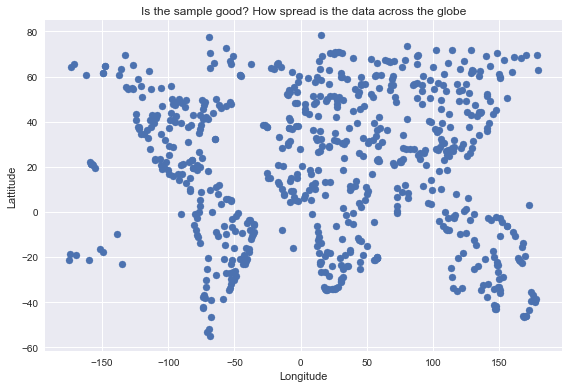

In [58]:
# check if the data is well spread to decide whether temperature increases near the equator
plt.scatter(city_weather_DF['Lng'],city_weather_DF['Lat'])
plt.title("Is the sample good? How spread is the data across the globe")
plt.xlabel('Longitude')
plt.ylabel('Lattitude')

plt.tight_layout()
plt.savefig(os.path.join(image_dir,'SampleSpread.png'))
plt.show()

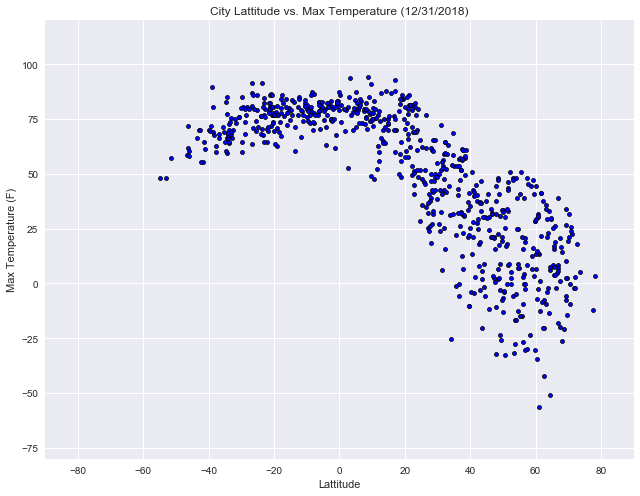

In [60]:
# Lattitude vs Temperature Plot

# initialise plt and set plot size
fig, ax = plt.subplots(figsize = (9,7))

# create a scatter plot for Lattitude vs Temperature
ax_hndl = ax.scatter("Lat","Max Temp", data=city_weather_DF.loc[:,['Lat','Max Temp']], \
                     s = 16, c = 'blue',edgecolor = 'black', label = "Max Temperature", \
                linewidths = 0.75)
# Set up plot parameters - Title, labels, x & y limits
ax.set_title("City Lattitude vs. Max Temperature (" + max(city_weather_DF['Date Converted']) + ")")
ax.set_xlabel("Lattitude")
ax.set_ylabel("Max Temperature (F)")
ax.set_xlim(-90,90, 10)
ax.set_ylim(-80, 120, 20)

#save plot to .png file
plt.tight_layout()
plt.savefig(os.path.join(image_dir,'Lattitude_Temp.png'))
plt.show()

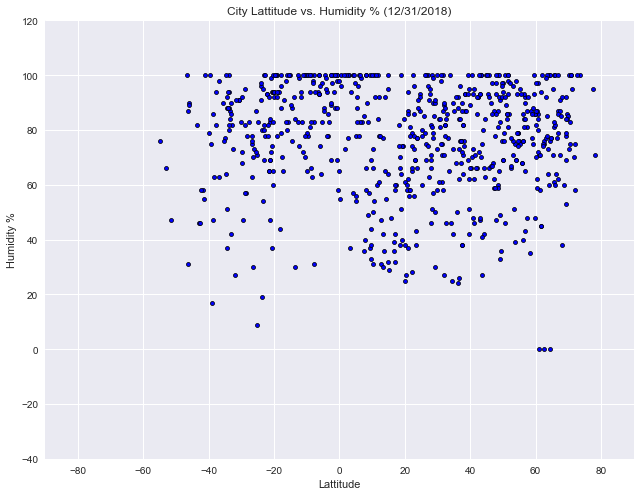

In [54]:
# Lattitude vs Humidity Plot

# initialise plt and set plot size
fig, ax = plt.subplots(figsize = (9,7))

# create a scatter plot for Lattitude vs Humidity %
ax_hndl = ax.scatter("Lat","Humidity", data=city_weather_DF.loc[:,['Lat','Humidity']], \
                     s = 16, c = 'blue',edgecolor = 'black', label = "Humidity", \
                linewidths = 0.75)

# Set up plot parameters - Title, labels, x & y limits
ax.set_title("City Lattitude vs. Humidity % (" + max(city_weather_DF['Date Converted']) + ")")
ax.set_xlabel("Lattitude")
ax.set_ylabel("Humidity %")
ax.set_xlim(-90,90, 10)
ax.set_ylim(-40, 120, 20)

#save plot to .png file
plt.tight_layout()
plt.savefig(os.path.join(image_dir,'Lattitude_Humidity.png'))

plt.show()

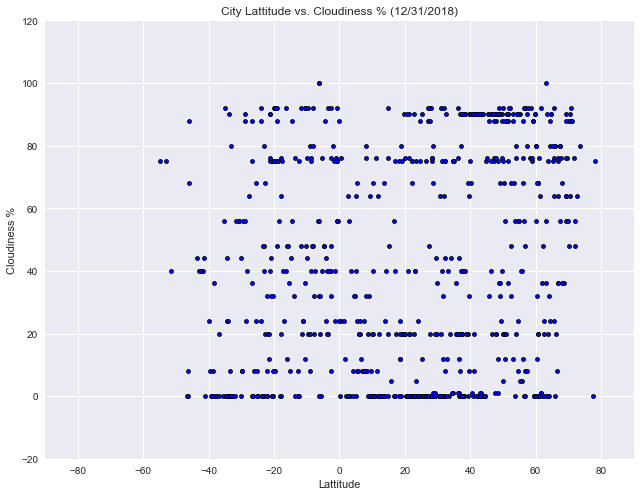

In [56]:
# Lattitude vs Cloudiness % Plot
# initialise plt and set plot size
fig, ax = plt.subplots(figsize = (9,7))

# create a scatter plot for Lattitude vs Cloudiness %
ax_hndl = ax.scatter("Lat","Cloudiness", data=city_weather_DF.loc[:,['Lat','Cloudiness']], \
                     s = 16, c = 'blue',edgecolor = 'black', label = "Cloudiness", \
                linewidths = 0.75)

# Set up plot parameters - Title, labels, x & y limits
ax.set_title("City Lattitude vs. Cloudiness % (" + max(city_weather_DF['Date Converted']) + ")")
ax.set_xlabel("Lattitude")
ax.set_ylabel("Cloudiness %")
ax.set_xlim(-90,90, 10)
ax.set_ylim(-20, 120, 20)

#save plot to .png file
plt.tight_layout()
plt.savefig(os.path.join(image_dir,'Lattitude_Cloudiness.png'))

plt.show()

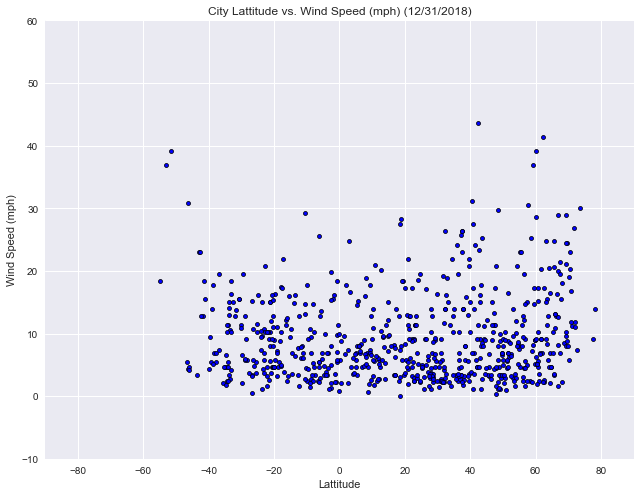

In [57]:
# Lattitude vs Wind Speed Plot
# initialise plt and set plot size
fig, ax = plt.subplots(figsize = (9,7))

# create a scatter plot for Lattitude vs Wind Speed (mph)
ax_hndl = ax.scatter("Lat","Wind Speed", data=city_weather_DF.loc[:,['Lat','Wind Speed']], \
                     s = 16, c = 'blue',edgecolor = 'black', label = "Wind Speed", \
                linewidths = 0.75)

# Set up plot parameters - Title, labels, x & y limits
ax.set_title("City Lattitude vs. Wind Speed (mph) (" + max(city_weather_DF['Date Converted']) + ")")
ax.set_xlabel("Lattitude")
ax.set_ylabel("Wind Speed (mph)")
ax.set_xlim(-90,90, 10)
ax.set_ylim(-10, 60, 10)

#save plot to .png file
plt.tight_layout()
plt.savefig(os.path.join(image_dir,'Lattitude_WindSpd.png'))

plt.show()